In [1]:
import geopandas 

In [2]:
ard_happiness = geopandas.GeoDataFrame.from_file('AOI/conus_ard_grid.shp')

In [3]:
ard_happiness.head()

,FID_1,h,v,geometry
0,0,2,0,"POLYGON ((-2265585.000 3314805.000, -2115585.0..."
1,1,2,1,"POLYGON ((-2265585.000 3164805.000, -2115585.0..."
2,2,2,2,"POLYGON ((-2265585.000 3014805.000, -2115585.0..."
3,3,2,3,"POLYGON ((-2265585.000 2864805.000, -2115585.0..."
4,4,2,4,"POLYGON ((-2265585.000 2714805.000, -2115585.0..."


In [4]:
? ard_happiness 

Type:        GeoDataFrame
String form:
FID_1   h  v                                           geometry
           0        0   2  0  POLYGON ( <...> 0...
           725      0  32  0  POLYGON ((2384415.000 3164805.000, 2234415.000...
           
           [726 rows x 4 columns]
Length:      726
File:        /efs/mambaforge/envs/water/lib/python3.11/site-packages/geopandas/geodataframe.py
Docstring:  
A GeoDataFrame object is a pandas.DataFrame that has a column
with geometry. In addition to the standard DataFrame constructor arguments,
GeoDataFrame also accepts the following keyword arguments:

Parameters
----------
crs : value (optional)
    Coordinate Reference System of the geometry objects. Can be anything accepted by
    :meth:`pyproj.CRS.from_user_input() <pyproj.crs.CRS.from_user_input>`,
    such as an authority string (eg "EPSG:4326") or a WKT string.
geometry : str or array (optional)
    If str, column to use as geometry. If array, will be set as 'geometry'
    column on Ge

In [5]:
ard_happiness.crs

<Projected CRS: PROJCS["Albers_Conic_Equal_Area",GEOGCS["WGS 84",D ...>
Name: Albers_Conic_Equal_Area
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Albers Equal Area
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [6]:
full_us = geopandas.GeoDataFrame.from_file('AOI/gz_2010_us_outline_500k.json')

In [7]:
full_us

,TYPE,R_STATEFP,L_STATEFP,geometry
0,CANADIAN,53,,"LINESTRING (-122.75802 49.00236, -122.40783 49..."
1,CANADIAN,30,,"LINESTRING (-116.04919 49.00091, -116.00103 49..."
2,COASTAL,53,,"LINESTRING (-123.03539 49.00215, -123.02146 48..."
3,COASTAL,,53,"LINESTRING (-123.02549 48.71797, -123.04018 48..."
4,COASTAL,53,,"LINESTRING (-122.69591 48.73727, -122.66895 48..."
...,...,...,...,...
610,COASTAL,02,,"LINESTRING (-159.83200 55.01223, -159.84247 55..."
611,COASTAL,02,,"LINESTRING (-131.25249 55.01165, -131.28105 55..."
612,COASTAL,02,,"LINESTRING (-132.75505 54.99157, -132.88414 55..."
613,COASTAL,02,,"LINESTRING (-161.87791 54.98370, -161.88362 54..."


In [8]:
import matplotlib.pyplot as plt

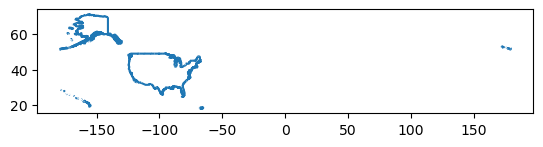

In [9]:
ax = full_us.plot()

In [10]:
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

In [11]:
? full_us.plot()

Object ` full_us.plot()` not found.


In [12]:
? geopandas.plot

Object ` geopandas.plot` not found.


In [13]:
ard_happiness.plot(ax=ax, color='red', marker='o', markersize=5)

<Axes: >

<Figure size 640x480 with 0 Axes>

In [14]:
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

<Axes: >

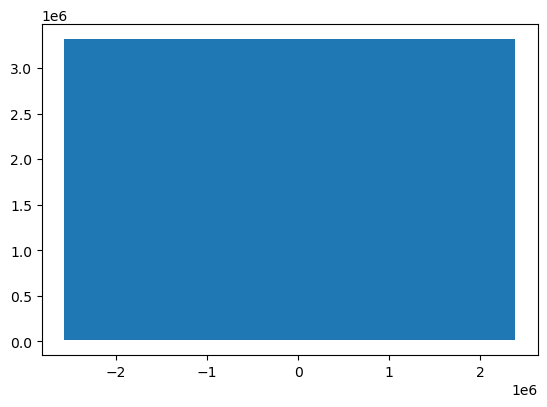

In [15]:
ard_happiness.plot()

In [16]:
all_states = geopandas.GeoDataFrame.from_file('AOI/gz_2010_us_040_00_500k.json')

In [17]:
all_states.head()

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry
0,0400000US23,23,Maine,,30842.923,"MULTIPOLYGON (((-67.61976 44.51975, -67.61541 ..."
1,0400000US25,25,Massachusetts,,7800.058,"MULTIPOLYGON (((-70.83204 41.60650, -70.82373 ..."
2,0400000US26,26,Michigan,,56538.901,"MULTIPOLYGON (((-88.68443 48.11579, -88.67563 ..."
3,0400000US30,30,Montana,,145545.801,"POLYGON ((-104.05770 44.99743, -104.25015 44.9..."
4,0400000US32,32,Nevada,,109781.180,"POLYGON ((-114.05060 37.00040, -114.04999 36.9..."


In [18]:
all_states['NAME'].unique()

array(['Maine', 'Massachusetts', 'Michigan', 'Montana', 'Nevada',
       'New Jersey', 'New York', 'North Carolina', 'Ohio', 'Pennsylvania',
       'Rhode Island', 'Tennessee', 'Texas', 'Utah', 'Washington',
       'Wisconsin', 'Puerto Rico', 'Maryland', 'Alabama', 'Alaska',
       'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut',
       'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Hawaii',
       'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky',
       'Louisiana', 'Minnesota', 'Mississippi', 'Missouri', 'Nebraska',
       'New Hampshire', 'New Mexico', 'North Dakota', 'Oklahoma',
       'Oregon', 'South Carolina', 'South Dakota', 'Vermont', 'Virginia',
       'West Virginia', 'Wyoming'], dtype=object)

In [19]:
nd_df = all_states[all_states['NAME'].str.contains('North Dakota')]

In [20]:
import folium
# Create a Folium Map centered on the data
m = folium.Map(location=[nd_df.geometry.centroid.y.mean(), nd_df.geometry.centroid.x.mean()], zoom_start=10)

# Convert GeoPandas DataFrame to GeoJSON
geojson_data = nd_df.to_crs(epsg='4326').to_json()

# Overlay the GeoJSON data on the Folium Map
folium.GeoJson(geojson_data).add_to(m)

# Show the map
m

/tmp/ipykernel_9850/3358430959.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  m = folium.Map(location=[nd_df.geometry.centroid.y.mean(), nd_df.geometry.centroid.x.mean()], zoom_start=10)


In [21]:
def add_geojson(my_geo_json, map3, color='pink'):
                my_geo = gpd.read_file(geojson_bb_file)
                center=my_geo.geometry[0].bounds[1], my_geo.geometry[0].bounds[0]
                sw = center
                ne = my_geo.geometry[0].bounds[3], my_geo.geometry[0].bounds[2]
                #map3 = folium.Map(location=center, zoom_start=12,center=center)
                #map3.fit_bounds([sw,ne])
                my_geo_json = my_geo.to_json()
                style_function= lambda x:{'color':color}
                folium.GeoJson(my_geo_json,style_function).add_to(map3)
                return(map3)

In [22]:
ard_happiness

,FID_1,h,v,geometry
0,0,2,0,"POLYGON ((-2265585.000 3314805.000, -2115585.0..."
1,1,2,1,"POLYGON ((-2265585.000 3164805.000, -2115585.0..."
2,2,2,2,"POLYGON ((-2265585.000 3014805.000, -2115585.0..."
3,3,2,3,"POLYGON ((-2265585.000 2864805.000, -2115585.0..."
4,4,2,4,"POLYGON ((-2265585.000 2714805.000, -2115585.0..."
...,...,...,...,...
721,0,32,1,"POLYGON ((2384415.000 3014805.000, 2234415.000..."
722,0,29,0,"POLYGON ((1934415.000 3164805.000, 1784415.000..."
723,0,30,0,"POLYGON ((2084415.000 3164805.000, 1934415.000..."
724,0,31,0,"POLYGON ((2234415.000 3164805.000, 2084415.000..."


In [23]:
from shapely.geometry import shape, GeometryCollection

In [24]:
nd_df_albers = nd_df.to_crs(ard_happiness.crs)

In [25]:
hv_in_nd_gdf = geopandas.overlay(ard_happiness, nd_df_albers, how='intersection')

In [26]:
hv_in_nd_gdf

,FID_1,h,v,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry
0,214,12,4,0400000US38,38,North Dakota,,69000.798,"POLYGON ((-615585.000 2576524.360, -623882.830..."
1,233,13,2,0400000US38,38,North Dakota,,69000.798,"POLYGON ((-465585.000 2864805.000, -599653.921..."
2,234,13,3,0400000US38,38,North Dakota,,69000.798,"POLYGON ((-465585.000 2864805.000, -465585.000..."
3,235,13,4,0400000US38,38,North Dakota,,69000.798,"POLYGON ((-465585.000 2714805.000, -465585.000..."
4,254,14,2,0400000US38,38,North Dakota,,69000.798,"POLYGON ((-315585.000 2864805.000, -465585.000..."
5,255,14,3,0400000US38,38,North Dakota,,69000.798,"POLYGON ((-315585.000 2864805.000, -315585.000..."
6,256,14,4,0400000US38,38,North Dakota,,69000.798,"POLYGON ((-315585.000 2714805.000, -315585.000..."
7,257,14,5,0400000US38,38,North Dakota,,69000.798,"POLYGON ((-315585.000 2564805.000, -315585.000..."
8,275,15,2,0400000US38,38,North Dakota,,69000.798,"POLYGON ((-165585.000 2864805.000, -315585.000..."
9,276,15,3,0400000US38,38,North Dakota,,69000.798,"POLYGON ((-165585.000 2864805.000, -165585.000..."


In [27]:
nd_h16_v4 = hv_in_nd_gdf.loc[(hv_in_nd_gdf['h'] == 16) & (hv_in_nd_gdf['v'] == 4)]

In [28]:
nd_h16_v4

,FID_1,h,v,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry
14,298,16,4,0400000US38,38,North Dakota,,69000.798,"POLYGON ((-65349.572 2714805.000, -65508.893 2..."


In [29]:
nd_h16_v4_4326 = nd_h16_v4.to_crs('EPSG:4326')

In [30]:
my_geo_json = nd_h16_v4_4326.to_json()

In [31]:
style_function= lambda x:{'color':'red'}
folium.GeoJson(my_geo_json,style_function).add_to(m)

In [32]:
m

In [33]:
nd_h16_v4_tile = ard_happiness.loc[(ard_happiness['h'] == 16) & (ard_happiness['v'] == 4)]

In [34]:
nd_h16_v4_4326 = nd_h16_v4_tile.to_crs('EPSG:4326')

In [35]:
my_geo_json = nd_h16_v4_4326.to_json()

In [36]:
style_function= lambda x:{'color':'yellow'}
folium.GeoJson(my_geo_json,style_function).add_to(m)

In [37]:
m

# Result
### We are happy with our ARD tile H16 V04